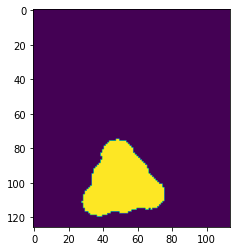

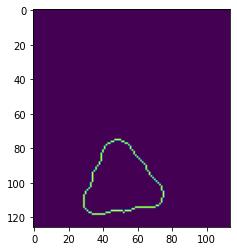

In [36]:
import cv2
import numpy as np
from scipy.ndimage.morphology import binary_dilation, binary_erosion
from scipy.ndimage.morphology import binary_fill_holes
from tifffile import imread, imwrite
import matplotlib.pyplot as plt
from skimage.filters import threshold_otsu
from skimage.morphology import skeletonize
fname = 'C:/Users/rando/Downloads/raw.tif'
iterations = 5
font = cv2.FONT_HERSHEY_COMPLEX
BinaryImage = imread(fname)
thresh = threshold_otsu(BinaryImage)
BinaryImage = BinaryImage > thresh
BinaryImage = binary_fill_holes(binary_dilation(BinaryImage, iterations=iterations)) 
BinaryImage = binary_erosion(BinaryImage, iterations=iterations)
BinaryImage = BinaryImage.astype('uint8')

plt.imshow(BinaryImage)
plt.show()
contours, hierarchy = cv2.findContours(BinaryImage, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

image = np.zeros(BinaryImage.shape)
# draw the contours on the empty image

cv2.drawContours(image, contours, -1, (255,255,255), 3)
image = image > 0
image = skeletonize(image)
imwrite('C:/Users/rando/Downloads/contours' + '.tif',image) 
plt.imshow(image)
plt.show()


In [37]:
print(contours)

(array([[[ 48,  75]],

       [[ 47,  76]],

       [[ 44,  76]],

       [[ 41,  79]],

       [[ 41,  80]],

       [[ 40,  81]],

       [[ 40,  82]],

       [[ 39,  83]],

       [[ 39,  84]],

       [[ 40,  85]],

       [[ 40,  86]],

       [[ 39,  87]],

       [[ 39,  88]],

       [[ 35,  92]],

       [[ 35,  94]],

       [[ 34,  95]],

       [[ 34, 101]],

       [[ 30, 105]],

       [[ 30, 106]],

       [[ 29, 107]],

       [[ 29, 110]],

       [[ 28, 111]],

       [[ 29, 112]],

       [[ 29, 114]],

       [[ 30, 115]],

       [[ 30, 116]],

       [[ 31, 116]],

       [[ 33, 118]],

       [[ 36, 118]],

       [[ 37, 119]],

       [[ 39, 119]],

       [[ 40, 118]],

       [[ 42, 118]],

       [[ 43, 117]],

       [[ 44, 117]],

       [[ 45, 116]],

       [[ 49, 116]],

       [[ 50, 117]],

       [[ 54, 117]],

       [[ 55, 116]],

       [[ 56, 116]],

       [[ 57, 115]],

       [[ 59, 115]],

       [[ 60, 114]],

       [[ 64, 114]],

       [[

In [53]:
image_obj = np.zeros(BinaryImage.shape)
coordinates = []
for cnt in contours:
    approx = cv2.approxPolyDP(cnt, 0.07*cv2.arcLength(cnt,True),True)
    if len(approx) == 3:
        coordinates.append([cnt])
        cv2.drawContours(image_obj, [cnt], 0, (255, 255, 255), 3)

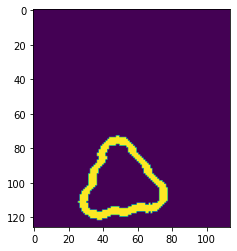

In [54]:
plt.imshow(image_obj)
plt.show()

In [57]:
print(approx)

[[[ 53  76]]

 [[ 33 118]]

 [[ 75 110]]]
